In [15]:
# Import packages. Note that this is done in the underlying kernel (accessible by all cells in document)

import numpy as np
import math
import qiskit

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator

from math import pi

In [3]:
# Build base circuit here. 
# The circuit obviously resets each time it's run, since circ is defined in this cell. For the circuit to grow each time the cell is executed, circ would have to be initialised in an external cell.
# Let's make it a circuit that generates the Bell basis, i.e. states beta_{ij} for i,j defined below.
# For the purposes of the Bell experiment, we take i=j=1

i=1
j=1

circ=QuantumCircuit(2)  

if i==1:
    circ.x(0)
if j==1:
    circ.x(1)
circ.h(0)
circ.cx(0,1)
print('Circuit for Bell state beta_{',i,j,'}:')
circ.draw()

Circuit for Bell state beta_{ 1 1 }:


┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘

In [6]:
# load trivial n-qubit state 'state' and evolve according to 'circ'. n defined in cell.
# Note that state is reloaded each time the cell is executed. If we want it to evolve accumulatively, can initialise it in a separate cell.
# N.B! the 3-qubit state is represented |q_2 q_1 q_0> (i.e. in reverse), which filters through to matrix reps etc. 
# Qiskit's flipped order of kets doesn't matter here, since Bell basis is symmetric (with beta_11 up to global sign)

n=2
state = Statevector.from_int(0, 2**n)
state=state.evolve(circ)
print('Bell state beta_{',i,j,'}:')
state.draw('latex')


Bell state beta_{ 1 1 }:


<IPython.core.display.Latex object>

In [5]:
# Define an alternative input circuit 'circ_alt' to experiment with here
# Can set inputcirc=circ_alt below
# Then can see probe CHSH inequality for alternative input states

circ_alt=QuantumCircuit(2)  
circ_alt.draw()

q_0: 
     
q_1:

In [74]:
# We now define 4 measurement circuits, corresponding to the measurements of different observables on pair of qubits
# The 1-qubit observables Q,R,S,T are defined as in Nielsen and Chuang
# Q and R are resepctively Pauli-Z and Pauli-X. S and T are respectively spin along axes v_1 and v_2
# where v_1=(-1,0,-1) and v_2=(-1,0,1)

# Measurement circuit 1 is called QS, and measures Q \otimes S
# Measurement circuit 2 is called RS, and measures R \otimes S
# Measurement circuit 3 is called RT, and measures R \otimes T
# Measurement circuit 4 is called QT, and measures Q \otimes T

In [7]:
# Define the circuit 'inputcirc' that generates the input state for measurement via 4 observables above.
# As per Nielsen and Chuang, this circuit is 'circ' for maximal violation of CHSH 
# Can set inputcirc=circ_alt to probe CHSH inequality for alternative input states

inputcirc=circ

In [16]:
# Definining Measurement circuit 1: QS

# Let's append a measurement circuit to our 2-qubit circuit 'circ'.
# To do this, we'll first create a measurement circuit 'measQS', and then prepend 'circ'. The total circuit will be 'QS'

# Create a quantum circuit with 2-qubits and 2-cbits. Barrier acts as a visual aid for splitting the combined circuits.
measQS = QuantumCircuit(2, 2)
measQS.barrier(range(2))
measQS.ry(3*pi/4,1)
# map the quantum measurement to the classical bits 
measQS.measure(range(2), range(2))

# The Qiskit circuit object supports composition. `compose' must feed a smaller circuit into a larger one.
# front=True prepends circ (false will post-pend)
QS = measQS.compose(inputcirc, range(2), front=True)

# drawing the circuit. 
QS.draw()

┌───┐┌───┐      ░             ┌─┐   
q_0: ┤ X ├┤ H ├──■───░─────────────┤M├───
     ├───┤└───┘┌─┴─┐ ░ ┌──────────┐└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(3π/4) ├─╫─┤M├
     └───┘     └───┘ ░ └──────────┘ ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1

In [17]:
# Definining Measurement circuit 2: RS

measRS = QuantumCircuit(2, 2)
measRS.barrier(range(2))
measRS.ry(-pi/2,0)
measRS.ry(3*pi/4,1)
measRS.measure(range(2), range(2))

RS = measRS.compose(inputcirc, range(2), front=True)

RS.draw()

┌───┐┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ X ├┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     ├───┤└───┘┌─┴─┐ ░ ├──────────┤└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(3π/4) ├─╫─┤M├
     └───┘     └───┘ ░ └──────────┘ ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1

In [18]:
# Definining Measurement circuit 2: RT

measRT = QuantumCircuit(2, 2)
measRT.barrier(range(2))
measRT.ry(-pi/2,0)
measRT.ry(pi/4,1)
measRT.measure(range(2), range(2))

RT = measRT.compose(inputcirc, range(2), front=True)

RT.draw()

┌───┐┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ X ├┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     ├───┤└───┘┌─┴─┐ ░ ├─────────┬┘└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(π/4) ├──╫─┤M├
     └───┘     └───┘ ░ └─────────┘  ║ └╥┘
c: 2/═══════════════════════════════╩══╩═
                                    0  1

In [19]:
# Definining Measurement circuit 2: QT

measQT = QuantumCircuit(2, 2)
measQT.barrier(range(2))
measQT.ry(pi/4,1)
measQT.measure(range(2), range(2))

QT = measQT.compose(inputcirc, range(2), front=True)

QT.draw()

┌───┐┌───┐      ░            ┌─┐   
q_0: ┤ X ├┤ H ├──■───░────────────┤M├───
     ├───┤└───┘┌─┴─┐ ░ ┌─────────┐└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(π/4) ├─╫─┤M├
     └───┘     └───┘ ░ └─────────┘ ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

In [21]:
# Can use Qiskit's inbuilt ability to compute expectation values of operator w.r.t input state (for small circuits)
# This (and other solutions) are describe here: quantumcomputing.stackexchange.com/questions/12080/

from qiskit.opflow import CircuitOp, CircuitStateFn

# Load operator z\otimes z into variable 'opy'. 
opz = QuantumCircuit(2)
opz.z(0)
opz.z(1)
opy = CircuitOp(opz)

# Define the circuits for QS,RS,RT,QT as above, but without measurement

print('In the following we calculate the exact expectation value of the observables QS,RS,RT,QT with respect to the state produced by the *pre-barrier* circuit. This is the same as the expectation value of observable Z with respect to the state produced by the entire circuit.\n')


# For QS, define QS_3
QS_2 = QuantumCircuit(2)
QS_2.barrier(range(2))
QS_2.ry(3*pi/4,1)

QS_3 = QS_2.compose(inputcirc, range(2), front=True)
print('QS:')
print(QS_3)

# Load action of circuit QS_3 on trivial input into state vector called QS_3
QS_3 = CircuitStateFn(QS_3)
# Calculate the expectation value of Z\otimesZ ('opy') w.r.t state QS_3
a=QS_3.adjoint().compose(opy).compose(QS_3).eval().real
print('E(QS):', a)
print('\n')



# For RS, define RS_3
RS_2 = QuantumCircuit(2)
RS_2.barrier(range(2))
RS_2.ry(-pi/2,0)
RS_2.ry(3*pi/4,1)

RS_3 = RS_2.compose(inputcirc, range(2), front=True)
print('RS:')
print(RS_3)

RS_3 = CircuitStateFn(RS_3)
b=RS_3.adjoint().compose(opy).compose(RS_3).eval().real
print('E(RS):', b)
print('\n')



# For RT, define RT_3
RT_2 = QuantumCircuit(2)
RT_2.barrier(range(2))
RT_2.ry(-pi/2,0)
RT_2.ry(pi/4,1)

RT_3 = RT_2.compose(inputcirc, range(2), front=True)
print('RT:')
print(RT_3)

RT_3 = CircuitStateFn(RT_3)
c=RT_3.adjoint().compose(opy).compose(RT_3).eval().real
print('E(RT):', c)
print('\n')




# For QT, define QT_3
QT_2 = QuantumCircuit(2)
QT_2.barrier(range(2))
QT_2.ry(pi/4,1)

QT_3 = QT_2.compose(inputcirc, range(2), front=True)
print('QT:')
print(QT_3)

QT_3 = CircuitStateFn(QT_3)
d=QT_3.adjoint().compose(opy).compose(QT_3).eval().real
print('E(QT):', d)
print('\n')



#Output
print('E(QS+RS+RT-QT)=',a+b+c-d)

# Print the state generated by 'inputcirc', w.r.t. which measurements of observables were taken
state = Statevector.from_int(0, 2**2)
state=state.evolve(inputcirc)
print('\n' + 'The above calculations were run with respect to the following input state (produced by pre-barrier circuit):')
state.draw('latex')


In the following we calculate the exact expectation value of the observables QS,RS,RT,QT with respect to the state produced by the *pre-barrier* circuit. This is the same as the expectation value of observable Z with respect to the state produced by the entire circuit.

QS:
     ┌───┐┌───┐      ░             
q_0: ┤ X ├┤ H ├──■───░─────────────
     ├───┤└───┘┌─┴─┐ ░ ┌──────────┐
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(3π/4) ├
     └───┘     └───┘ ░ └──────────┘
E(QS): 0.7071067811865472


RS:
     ┌───┐┌───┐      ░ ┌──────────┐
q_0: ┤ X ├┤ H ├──■───░─┤ Ry(-π/2) ├
     ├───┤└───┘┌─┴─┐ ░ ├──────────┤
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(3π/4) ├
     └───┘     └───┘ ░ └──────────┘
E(RS): 0.7071067811865476


RT:
     ┌───┐┌───┐      ░ ┌──────────┐
q_0: ┤ X ├┤ H ├──■───░─┤ Ry(-π/2) ├
     ├───┤└───┘┌─┴─┐ ░ ├─────────┬┘
q_1: ┤ X ├─────┤ X ├─░─┤ Ry(π/4) ├─
     └───┘     └───┘ ░ └─────────┘ 
E(RT): 0.7071067811865475


QT:
     ┌───┐┌───┐      ░            
q_0: ┤ X ├┤ H ├──■───░────────────
     ├───┤└───┘┌─┴─

C:\Users\Sachin\AppData\Local\Temp\ipykernel_13460\1355606002.py:10: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.circuit_op.CircuitOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  opy = CircuitOp(opz)
C:\Users\Sachin\AppData\Local\Temp\ipykernel_13460\1355606002.py:27: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  QS_3 = CircuitStateFn(QS_3)
C:\Users\Sachin\AppData\Local\Temp\ipykernel_13460\1355606002.py:45: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code

<IPython.core.display.Latex object>

In [25]:
# Make sure you have run the cells above before this one, or will get errors!
# Now we're going to simulate N shots of circuits QS,RS,RT,QT
N=100000

# Print details about what we're doing
print('We will measure observables QS,RS,RT,QT ' + str(N) + ' times each, with respect to an input state generated by the following circuit:')
print(inputcirc)


# Adding the transpiler to reduce the circuit to QASM (quantum assembler code) instructions.
# supported by the backend. The 'backend' is usually a quantum computer or a simulator.
from qiskit import transpile

# Use AerSimulator as backend
from qiskit_aer import AerSimulator
backend = AerSimulator()

# string is an array of circuits to loop through; counter tracks the iteration number in this loop
# E is the expectation value to be computed; parity tracks the sign in E(QS)+E(RS)+E(RT)-E(QT)
# I.e. we will flip the sign of parity when we add E(QT) during the for-loop
string=(QS,RS,RT,QT)
string_2=('QS','RS','RT','QT')
counter=0
E=0
parity=1

for jcirc in string:
    
    # For each iteration through string, we will compute an average `av'
    av=0
    counter+=1
    
    # First we have to transpile the quantum circuit to the low-level QASM instructions used by the backend.
    # Here, we'll be transpiling our circuit into QASM run on AerSimulator
    circ_compiled = transpile(jcirc, backend)

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit to be N
    job_sim = backend.run(circ_compiled, shots=N)

    # Grab the results from the job.
    result_sim = job_sim.result()

    # Print the counts from the simulation of N shots on each circuit QS,RS,RT,QT
    counts = result_sim.get_counts()
    print(string_2[(counter-1)]+':')
    print(counts)
    
    # In case some outcomes are measured 0 times over our N shots, we define default values for them as 0 in counts
    outcomes={'00','01','10','11'}
    for j in outcomes:
        value = counts.setdefault(j, 0)
    
    # The measurement outcome is +1 when have 11,00 (eigenvalues match)
    # and outcome of measuring observable is -1 when measure 01,10 (eigenvalues differ)
    if counter == 4:
        parity=-1
    av=parity*((counts['00']+counts['11']-counts['01']-counts['10'])/N)    
    E+=av
    
# Print the results
print ('\n'+'Estimated value of E(QS)+E(RS)+E(RT)+E(QT) via above simulation is ' + str(E) + '.')
print ('Exact value of E(QS)+E(RS)+E(RT)+E(QT) is ' + str(a+b+c-d) + '.')
print ('Theoretical maximum (Tsirelson\'s bound) is: ' + str(2*math.sqrt(2))) 


# Print the state generated by 'inputcirc', w.r.t. which measurements of observables were taken
n=2
state = Statevector.from_int(0, 2**n)
state=state.evolve(inputcirc)
print('\n' + 'The above calculations were run with respect to the following input state (produced by above circuit):')
state.draw('latex')

We will measure observables QS,RS,RT,QT 100000 times each, with respect to an input state generated by the following circuit:
     ┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     └───┘     └───┘
QS:
{'11': 42787, '10': 7335, '00': 42558, '01': 7320}
RS:
{'00': 42746, '10': 7241, '11': 42556, '01': 7457}
RT:
{'00': 42933, '11': 42709, '01': 7171, '10': 7187}
QT:
{'01': 42783, '10': 42589, '00': 7352, '11': 7276}

Estimated value of E(QS)+E(RS)+E(RT)+E(QT) via above simulation is 2.83322.
Exact value of E(QS)+E(RS)+E(RT)+E(QT) is 2.82842712474619.
Theoretical maximum (Tsirelson's bound) is: 2.8284271247461903

The above calculations were run with respect to the following input state (produced by above circuit):


<IPython.core.display.Latex object>

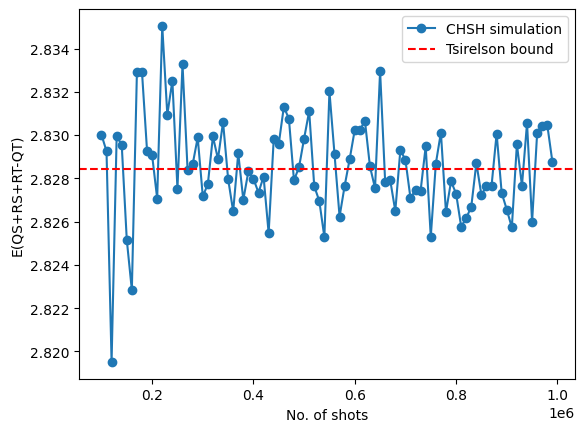

In [29]:
# Now we'll plot the averages as a function of the number of shots. 
# By the law of large numbers, the function should tend towards the the expectation value.

# shots_initial determines the initial number of shots to simulate the experiment for
# shots_increment determines the amount by which no. of shots increased in next simulation
# x_points determines the number of increments i.e. no. of simulations run
shots_initial=100000
shots_increment=10000
x_points=90

# shotpoints is the x-axis array, and plotpoints the y-axis array
shotpoints=[]
plotpoints=[]


import matplotlib.pyplot as plt
from qiskit import transpile
from qiskit_aer import AerSimulator
backend = AerSimulator()


string=(QS,RS,RT,QT)
N=shots_initial
i=0

while i<x_points:
    
    counter=0
    E=0
    parity=1
    
    for jcirc in string:
        
        av=0
        counter+=1
    
        circ_compiled = transpile(jcirc, backend)
        job_sim = backend.run(circ_compiled, shots=N)

        result_sim = job_sim.result()

        counts = result_sim.get_counts()
    
        outcomes={'00','01','10','11'}
        for j in outcomes:
            value = counts.setdefault(j, 0)
    
        if counter == 4:
            parity=-1
        av=parity*((counts['00']+counts['11']-counts['01']-counts['10'])/N)    
        E+=av
        
    shotpoints.append(N)
    plotpoints.append(E)
    N+=shots_increment
    i+=1
    
# Plot configuration
plt.plot(shotpoints,plotpoints, "o-", label='CHSH simulation')
plt.axhline(y = 2*math.sqrt(2), color = 'r', linestyle = '--', label='Tsirelson bound')
plt.xlabel('No. of shots')
plt.ylabel('E(QS+RS+RT-QT)')
plt.legend()